In [ ]:
%cd /content
!rm -r StyleCLIP-pytorch
!git clone https://github.com/ZloyTapok987/StyleCLIP-pytorch.git
%cd StyleCLIP-pytorch
!pip install git+https://github.com/openai/CLIP.git 
!pip install ninja

/content
rm: cannot remove 'StyleCLIP-pytorch': No such file or directory
Cloning into 'StyleCLIP-pytorch'...
remote: Enumerating objects: 467, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 467 (delta 19), reused 26 (delta 11), pack-reused 429
Receiving objects: 100% (467/467), 26.45 MiB | 31.79 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/StyleCLIP-pytorch
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-sno8e6ko
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-sno8e6ko
     |████████████████████████████████| 53 kB 1.4 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369389 sha256=bdd1031e484d1fb1a9d7a36af27a6dcd8e01c8d6e3bd4c251f533b4ef1ff6202
  Stored in directory: /tmp/pip-ephem-wheel-cache-z8stqpf2/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip
     |██████████████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install lpips
import os

import clip
import numpy as np
import PIL.Image
import torch

from embedding import get_delta_t
from manipulator import Manipulator
from mapper import get_delta_s
from wrapper import Generator

     |████████████████████████████████| 53 kB 1.2 MB/s 


In [ ]:
!pwd

# GPU device
device = torch.device('cuda:0')
torch.tensor([1, 2, 3]).to(device)
# pretrained ffhq generator
ckpt = '/content/drive/MyDrive/diploma/out.pkl'
G = Generator(ckpt, device)
# CLIP
model, preprocess = clip.load("ViT-B/32", device=device)
# global image direction
fs3 = np.load('/content/drive/MyDrive/diploma/StyleCLIP/tensor/fs3.npy')

/content/StyleCLIP-pytorch


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 110MiB/s]


mv: cannot stat 'tensor/fs3logo.npy': No such file or directory
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


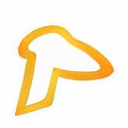

In [ ]:
!mv tensor/fs3logo.npy /content/drive/MyDrive/diploma/StyleCLIP/tensor/fs3.npy
z = torch.randn(1, 512).to(device)
img = G.synthesis(G.mapping(z, truncation_psi=0.7, truncation_cutoff=8))
#img = G.G.forward(z, truncation_psi=0.7, truncation_cutoff=8)
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
#img = G.synthesis(G.mapping(z, truncation_psi=1, skip_w_avg_update=True)).cpu().numpy()[0]
display(PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').resize((128,128),PIL.Image.LANCZOS))

In [ ]:
manipulator = Manipulator(G, device, face_preprocess=False, dataset_name="logo", num_images=20)

In [ ]:
imgdir = '/content/drive/MyDrive/diploma/LOGOS_REFORMAT/dog/lld48.jpg'

In [ ]:
manipulator.set_real_img_projection(imgdir, inv_mode='w', pti_mode='s')

OSError: ignored

In [ ]:
neutral = 'logo'
target = 'yellow logo'

# beta_threshold : Determines the degree of disentanglement, # channels manipulated
beta_threshold = 0.10

In [ ]:
classnames=[neutral, target]
# get delta_t in CLIP text space
delta_t = get_delta_t(classnames, model)
# get delta_s in global image directions and text directions that satisfy beta threshold
delta_s, num_channel = get_delta_s(fs3, delta_t, manipulator, beta_threshold=beta_threshold)
print(f'{num_channel} channels will be manipulated under the beta threshold {beta_threshold}')

38 channels will be manipulated under the beta threshold 0.1


In [ ]:
lst_alpha = [-2, -1, 0, 1, 2]
manipulator.set_alpha(lst_alpha)

In [ ]:
styles = manipulator.manipulate(delta_s)

In [ ]:
all_imgs = manipulator.synthesis_from_styles(styles, 0, manipulator.num_images)

-2


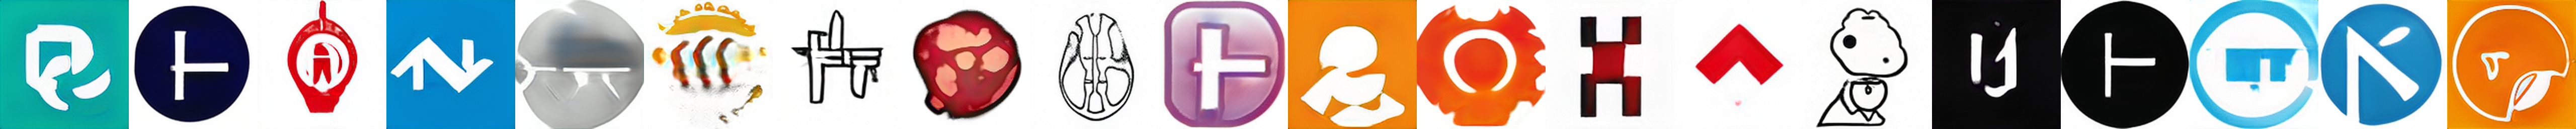

-1


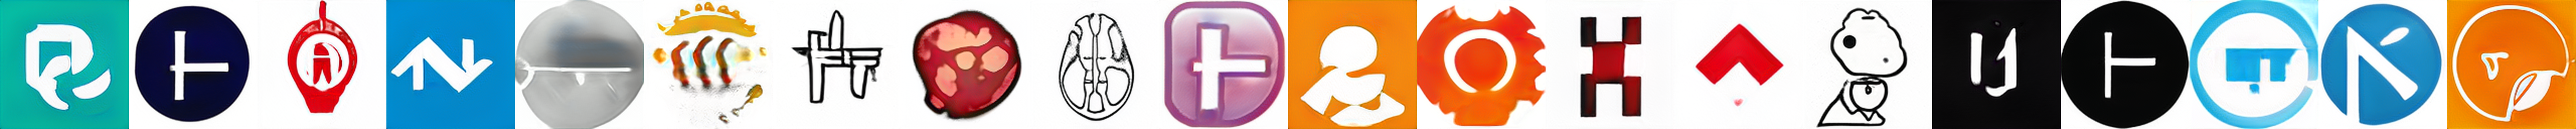

0


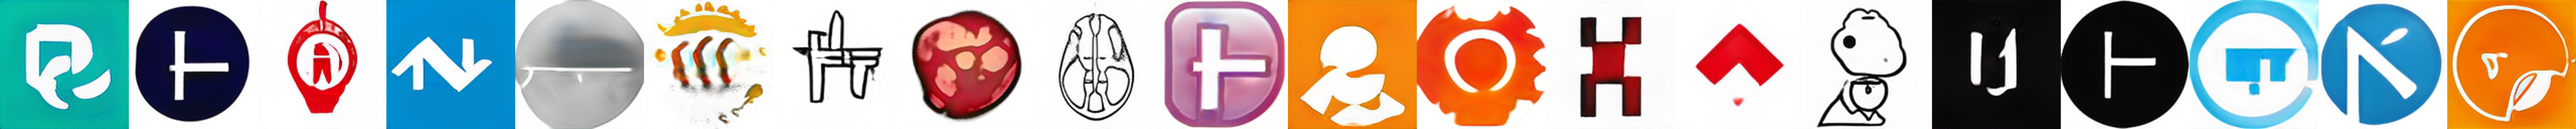

1


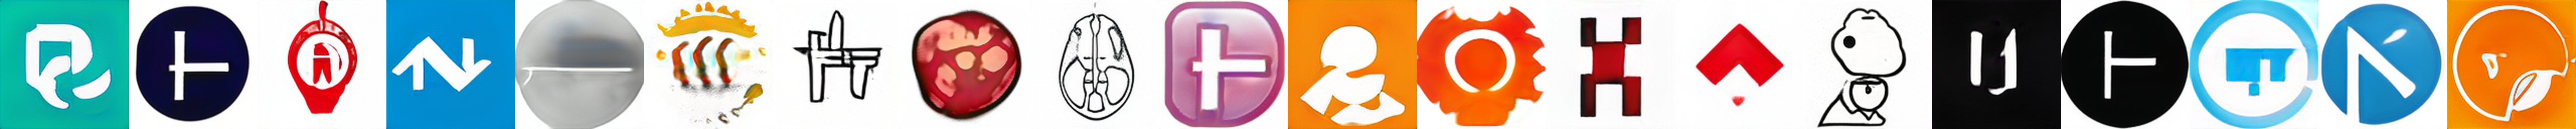

2


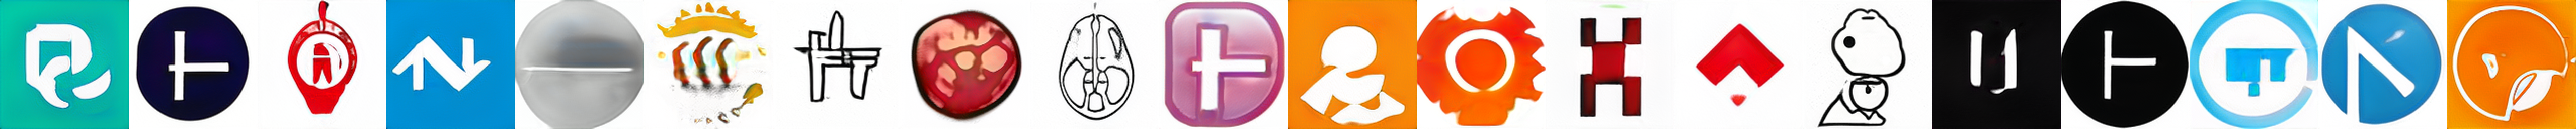

In [ ]:
# visualize
lst = []
for imgs in all_imgs:
    lst.append((imgs.permute(0,2,3,1)*127.5+128).clamp(0,255).to(torch.uint8).numpy())

H,W = (256,256)
gw, gh = (manipulator.num_images, 1)

for i, alpha in enumerate(lst_alpha):
    print(alpha)
    imgs = lst[i]
    imgs_ = []    
    for img in imgs:
        imgs_.append( np.asarray( PIL.Image.fromarray(img, 'RGB').resize((H,W),PIL.Image.LANCZOS)))
    imgs_ = np.stack(imgs_)
    imgs_ = imgs_.reshape(gh,gw,H,W,3)
    imgs_ = imgs_.transpose(0,2,1,3,4)
    imgs_ = imgs_.reshape(gh*H, gw*W, 3)
    display(PIL.Image.fromarray(imgs_, 'RGB'))

In [ ]:
!python extract.py --ckpt /content/drive/MyDrive/diploma/out.pkl --dataset_name logo

googogo
  0% 0/1000 [00:00<?, ?it/s]Setting up PyTorch plugin "bias_act_plugin"... Done.
100% 1000/1000 [00:04<00:00, 214.63it/s]
tcmalloc: large alloc 2457600000 bytes == 0x55e3ba9f6000 @  0x7fa7405ffb6b 0x7fa74061f379 0x7fa637c28cde 0x7fa637c2a452 0x7fa689c51cf3 0x7fa689c52867 0x7fa689fa5cc1 0x7fa689ce7571 0x7fa689ce7da5 0x7fa68a3b3e52 0x7fa68a2511db 0x7fa689cf0ebb 0x7fa68a4a8b02 0x7fa689f5ccbc 0x7fa68b8bb3e1 0x7fa68b8bbaf5 0x7fa689f94dfe 0x7fa7333f6b2e 0x55e253db3160 0x55e253db2ef0 0x55e253e27123 0x55e253e21a2e 0x55e253e21723 0x55e253eeb812 0x55e253eebb8d 0x55e253eeba36 0x55e253ec3183 0x55e253ec2e2c 0x7fa73f407c87 0x55e253ec2d0a


In [ ]:
!python manipulator.py extract --ckpt /content/drive/MyDrive/diploma/out.pkl --face_preprocess False --dataset_name logo 